In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df = pd.read_csv('data/datasets/AEP_hourly.csv')

In [196]:
df

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [198]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [199]:
df

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [200]:
df.describe()

,Datetime,AEP_MW
count,121273,121273.000000
mean,2011-09-02 03:17:01.553025024,15499.513717
min,2004-10-01 01:00:00,9581.000000
25%,2008-03-17 15:00:00,13630.000000
50%,2011-09-02 04:00:00,15310.000000
75%,2015-02-16 17:00:00,17200.000000
max,2018-08-03 00:00:00,25695.000000
std,NaN,2591.399065


In [201]:
df = df.set_index('Datetime')

In [202]:
df = df.resample('D').sum()  # untuk harian

<Axes: xlabel='Datetime'>

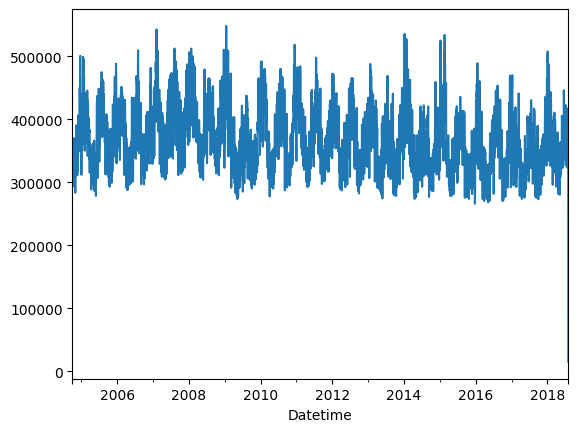

In [203]:
df['AEP_MW'].plot()

In [204]:
df = df.iloc[:-1]

In [205]:
df

,AEP_MW
Datetime,
2004-10-01,328544.0
2004-10-02,311997.0
2004-10-03,293450.0
2004-10-04,343417.0
2004-10-05,346553.0
...,...
2018-07-29,327792.0
2018-07-30,368834.0
2018-07-31,364327.0


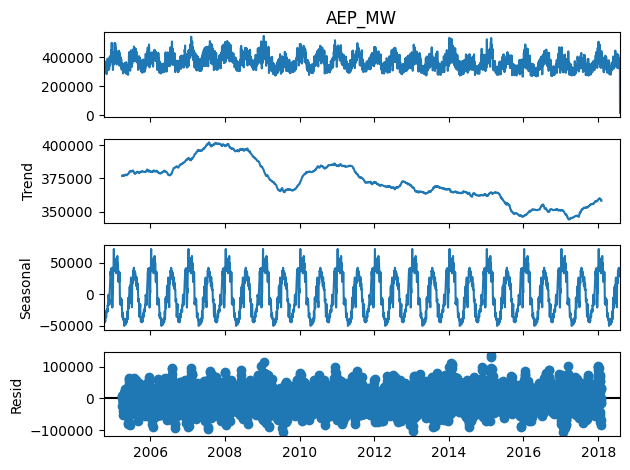

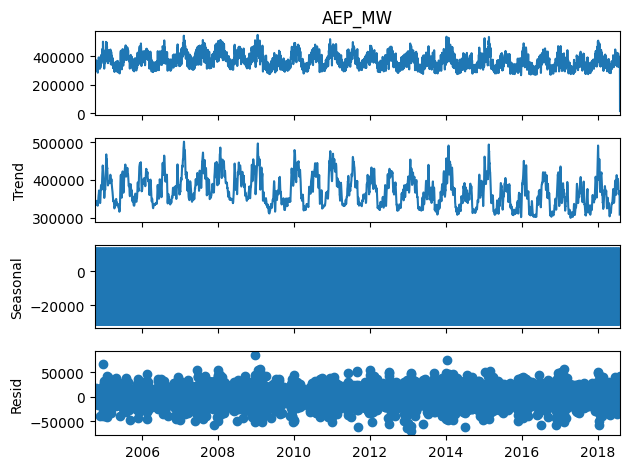

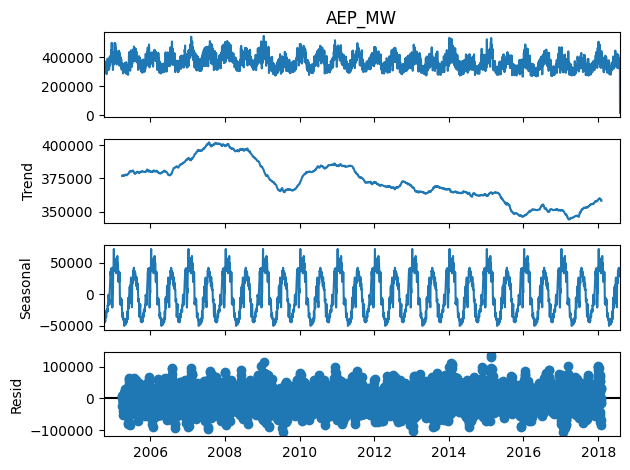

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df['AEP_MW'], model='additive').plot()
seasonal_decompose(df['AEP_MW'], model='additive', period=365).plot()
# seasonal_decompose(df['AEP_MW'], model='additive', period=365*4).plot()

In [94]:
from statsmodels.tsa.stattools import adfuller

adft = adfuller(df['AEP_MW'],autolag="AIC")

adft_air_passengers = pd.DataFrame({'Values':[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  
                                    , 'Metric':['Test Statistics','p-value','No. of lags used','Number of observations used', 
                                                'critical value (1%)', 'critical value (5%)', 'critical value (10%)']})

print(adft_air_passengers)

         Values                       Metric
0 -7.279596e+00              Test Statistics
1  1.512584e-10                      p-value
2  3.000000e+01             No. of lags used
3  5.024000e+03  Number of observations used
4 -3.431652e+00          critical value (1%)
5 -2.862115e+00          critical value (5%)
6 -2.567076e+00         critical value (10%)


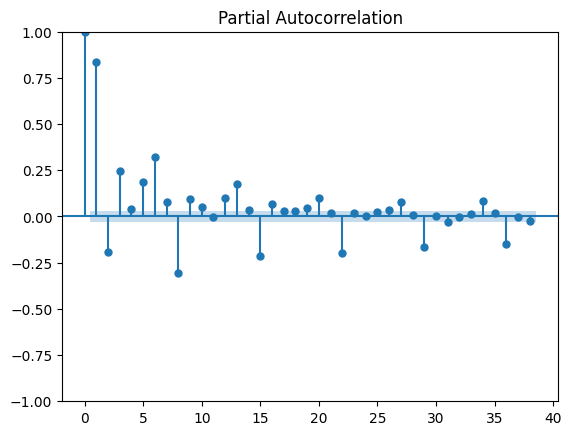

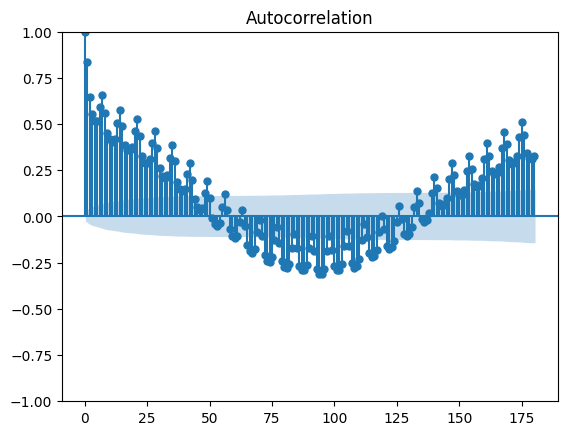

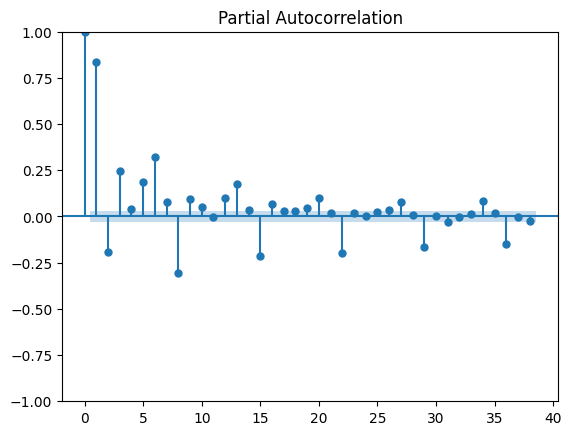

In [95]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['AEP_MW'],lags=180)
plot_pacf(df['AEP_MW'])


In [96]:
df

,AEP_MW
Datetime,
2004-10-01,328544.0
2004-10-02,311997.0
2004-10-03,293450.0
2004-10-04,343417.0
2004-10-05,346553.0
...,...
2018-07-30,368834.0
2018-07-31,364327.0
2018-08-01,363628.0


### SPLITTING

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:

# # Asumsikan df sudah disiapkan dan index-nya adalah datetime
# df['dayofyear'] = df.index.dayofyear
# df['sin_day'] = np.sin(2 * np.pi * df['dayofyear'] / 365)
# df['cos_day'] = np.cos(2 * np.pi * df['dayofyear'] / 365)

# # Ambil hanya fitur yang dibutuhkan
# features = ['AEP_MW', 'sin_day', 'cos_day']
# data = df[features]

# # Scaling
# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(data)


In [62]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])  # target AEP_MW ada di kolom index 0
    return np.array(X), np.array(y)

# Misal window 30 hari
seq_length = 365
X, y = create_sequences(data_scaled, seq_length)


In [59]:
# Buat tanggal cut-off
cutoff_index = df.index.get_loc('2014-01-01') - seq_length

X_train, X_test = X[:cutoff_index], X[cutoff_index:]
y_train, y_test = y[:cutoff_index], y[cutoff_index:]


D

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- Siapkan fitur musiman ---
df['dayofyear'] = df.index.dayofyear
df['sin_day'] = np.sin(2 * np.pi * df['dayofyear'] / 365)
df['cos_day'] = np.cos(2 * np.pi * df['dayofyear'] / 365)

features = ['AEP_MW', 'sin_day', 'cos_day']
data = df[features]

# --- Split & scaling ---
cutoff_date = '2014-01-01'
cutoff_index = df.index.get_loc(cutoff_date)

# Fit scaler hanya ke data sebelum 2014
scaler = MinMaxScaler()
scaler.fit(data.iloc[:cutoff_index])
data_scaled = scaler.transform(data)

# --- Sequence maker ---
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])  # AEP_MW index ke-0
    return np.array(X), np.array(y)

seq_length = 180
X, y = create_sequences(data_scaled, seq_length)

X_train, X_test = X[:cutoff_index - seq_length], X[cutoff_index - seq_length:]
y_train, y_test = y[:cutoff_index - seq_length], y[cutoff_index - seq_length:]

### Baseline Model

Epoch 1/20


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0384 - val_loss: 0.0149
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0150 - val_loss: 0.0155
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0144 - val_loss: 0.0142
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0133 - val_loss: 0.0138
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0130 - val_loss: 0.0141
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0133 - val_loss: 0.0138
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0126 - val_loss: 0.0127
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0123 - val_loss: 0.0110
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0112 - val_loss: 0.0093
Epoch 10/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0088 - val_loss: 0.0072
Epoch 11/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0072 - val_loss: 0.0063
Epoch 12/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0067 - val_l

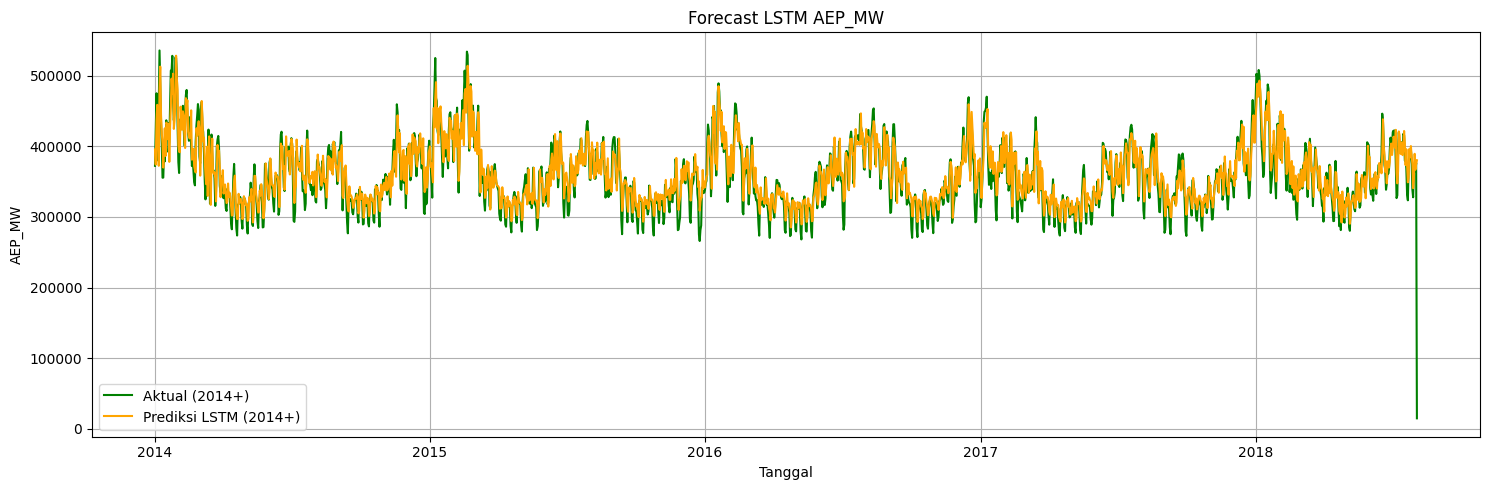

In [103]:


# --- Build model ---
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(seq_length, X.shape[2])))
# model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# --- Predict ---
y_pred = model.predict(X_test)

# --- Inverse transform hasil prediksi dan label ---
pad = X_test[:, -1, 1:]  # sin_day, cos_day
y_pred_full = np.concatenate([y_pred, pad], axis=1)
y_test_full = np.concatenate([y_test.reshape(-1, 1), pad], axis=1)

y_pred_inv = scaler.inverse_transform(y_pred_full)[:, 0]
y_test_inv = scaler.inverse_transform(y_test_full)[:, 0]

# --- RMSE ---
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'✅ RMSE (skala AEP_MW): {rmse:.4f}')

# --- Plot hasil ---
test_dates = df.index[cutoff_index:]
plt.figure(figsize=(15, 5))
plt.plot(test_dates, y_test_inv, label='Aktual (2014+)', color='green')
plt.plot(test_dates, y_pred_inv, label='Prediksi LSTM (2014+)', color='orange')
plt.title('Forecast LSTM AEP_MW')
plt.xlabel('Tanggal')
plt.ylabel('AEP_MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [99]:
print(f"Persentase Error: {(rmse / df['AEP_MW'].mean()) * 100:.2f}% dari rata-rata konsumsi harian")

Persentase Error: 6.44% dari rata-rata konsumsi harian


### Baseline Model XGBOOST

In [69]:
df_baseline = df.copy()

# Tambah lag fitur
df_baseline['lag_7'] = df_baseline['AEP_MW'].shift(7)
df_baseline['lag_30'] = df_baseline['AEP_MW'].shift(30)
df_baseline['lag_180'] = df_baseline['AEP_MW'].shift(180)
df_baseline['lag_365'] = df_baseline['AEP_MW'].shift(365)

# Hapus nilai NaN akibat shifting
df_baseline = df_baseline.dropna()


In [ ]:
train = df_baseline[df_baseline.index < '2014-01-01']
test = df_baseline[df_baseline.index >= '2014-01-01']

X_train = train[['lag_7', 'lag_30','lag_180', 'lag_365',]]
y_train = train['AEP_MW']

X_test = test[['lag_7', 'lag_30','lag_180', 'lag_365',]]
y_test = test['AEP_MW']


In [72]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f'✅ XGBoost RMSE: {rmse_xgb:.4f}')

✅ XGBoost RMSE: 38718.2488


### BASELINE MODEL

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense

# Buat model GRU
model = Sequential()
model.add(GRU(64, input_shape=(seq_length, X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mse')

# Training
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0201 - val_loss: 0.0116
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0129 - val_loss: 0.0097
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0115 - val_loss: 0.0085
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0098 - val_loss: 0.0078
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0093 - val_loss: 0.0073
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0087 - val_loss: 0.0067
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0080 - val_loss: 0.0067
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0087 - val_loss: 0.0068
Epoch 9/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0080 - val_loss: 0.0063
Epoch 10/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0078 - val_loss: 0.0064
Epoch 11/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0082 - val_loss: 0.0064
Epoch 12/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0081 - val_l

In [101]:
y_pred = model.predict(X_test)

# --- Inverse transform hasil prediksi dan label ---
pad = X_test[:, -1, 1:]  # sin_day, cos_day
y_pred_full = np.concatenate([y_pred, pad], axis=1)
y_test_full = np.concatenate([y_test.reshape(-1, 1), pad], axis=1)

y_pred_inv = scaler.inverse_transform(y_pred_full)[:, 0]
y_test_inv = scaler.inverse_transform(y_test_full)[:, 0]

# --- RMSE ---
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'✅ RMSE (skala AEP_MW): {rmse:.4f}')


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
✅ RMSE (skala AEP_MW): 23404.7094


### LR BASELINE


In [108]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Tambah fitur lag
df_baseline = df.copy()
df_baseline['lag_1'] = df_baseline['AEP_MW'].shift(1)
df_baseline['lag_7'] = df_baseline['AEP_MW'].shift(7)
df_baseline['lag_180'] = df_baseline['AEP_MW'].shift(180)
df_baseline['lag_365'] = df_baseline['AEP_MW'].shift(365)

# 2. Drop baris NaN
df_baseline = df_baseline.dropna()

# 3. Split train/test
train = df_baseline[df_baseline.index < '2014-01-01']
test = df_baseline[df_baseline.index >= '2014-01-01']

X_train = train[['lag_1', 'lag_7','lag_180', 'lag_365']]
y_train = train['AEP_MW']
X_test = test[['lag_1', 'lag_7', 'lag_180','lag_365']]
y_test = test['AEP_MW']

# 4. Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 5. RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ Baseline Linear Regression RMSE: {rmse_lr:.4f}")

✅ Baseline Linear Regression RMSE: 25335.7495


### PREDIKSI

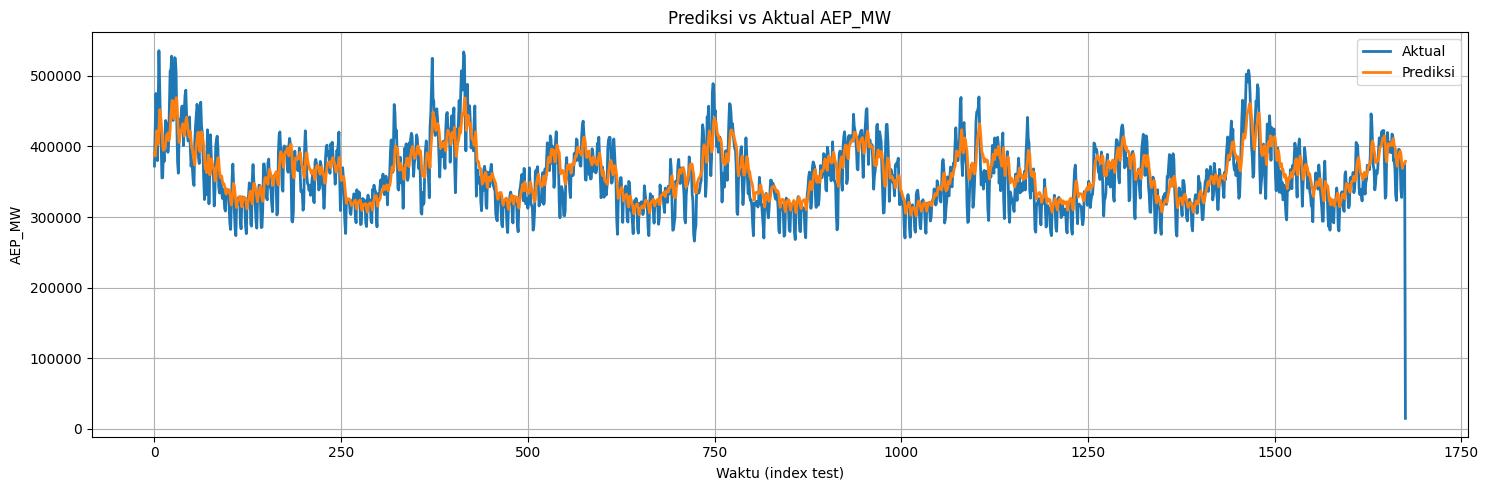

In [46]:
import matplotlib.pyplot as plt

# Kalau kamu pakai MinMaxScaler sebelumnya, balikkan prediksi ke skala asli
# Asumsikan scaler.fit_transform dipakai di seluruh kolom (AEP_MW, sin, cos)
# Jadi kolom ke-0 adalah AEP_MW
y_pred_inv = scaler.inverse_transform(np.concatenate([
    y_pred,  # prediksi AEP_MW
    X_test[:, -1, 1:]  # tambahkan sin_day dan cos_day dari X_test agar arraynya cocok
], axis=1))[:, 0]

y_test_inv = scaler.inverse_transform(np.concatenate([
    y_test.reshape(-1, 1),
    X_test[:, -1, 1:]
], axis=1))[:, 0]

# Plot hasil
plt.figure(figsize=(15, 5))
plt.plot(y_test_inv, label='Aktual', linewidth=2)
plt.plot(y_pred_inv, label='Prediksi', linewidth=2)
plt.title('Prediksi vs Aktual AEP_MW')
plt.xlabel('Waktu (index test)')
plt.ylabel('AEP_MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


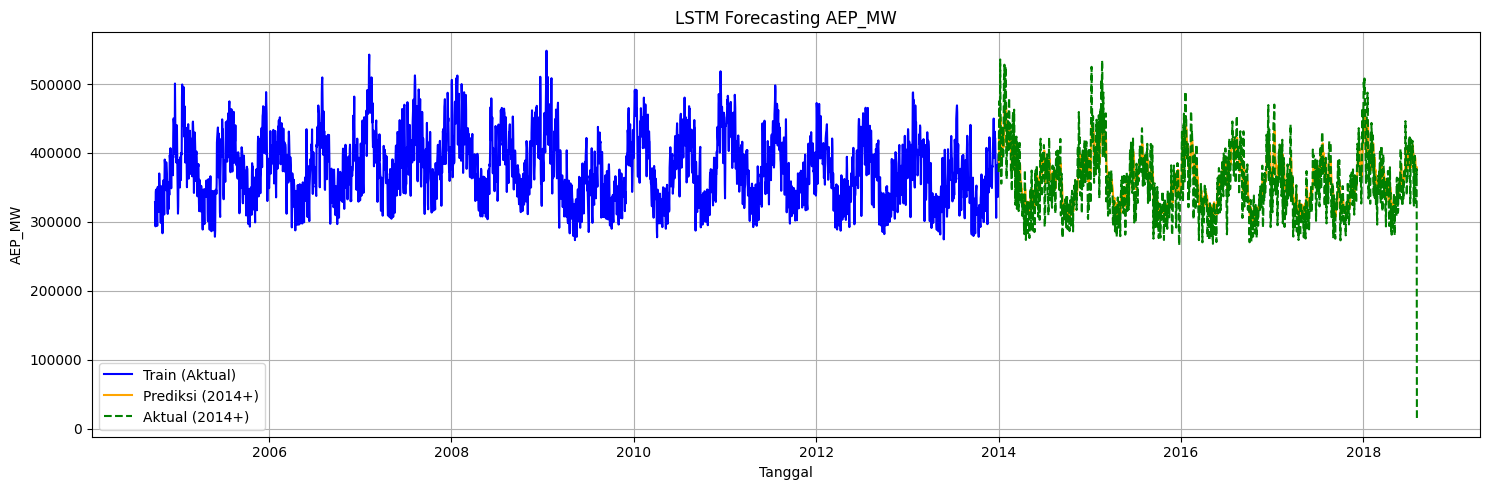

In [47]:
import matplotlib.pyplot as plt

# Buat data actual full (train + test), lalu pisahkan train & test
# Balikkan data dari scaling
full_data = df['AEP_MW'].values  # asumsikan ini data sebelum scaling

# Hitung index cutoff test (jumlah data sebelum test dimulai)
cutoff_index = df.index.get_loc('2014-01-01')

# Sequence mundur sejauh seq_length, jadi prediksi dimulai dari index ini:
start_pred_index = cutoff_index

# Ambil index test agar sumbu X bisa tampil tanggal
test_dates = df.index[start_pred_index : start_pred_index + len(y_test)]

# Jika kamu sudah inverse transform y_pred dan y_test:
# y_pred_inv, y_test_inv = nilai asli (setelah inverse transform)
# Kalau belum, kita pakai y_test dan y_pred (masih dalam skala)

plt.figure(figsize=(15, 5))

# 1. Plot data train (aktual sebelum 2014)
plt.plot(df.index[:cutoff_index], full_data[:cutoff_index], label='Train (Aktual)', color='blue')

# 2. Plot hasil prediksi
plt.plot(test_dates, y_pred_inv, label='Prediksi (2014+)', color='orange')

# 3. (Opsional) Garis aktual sesungguhnya di test set untuk perbandingan
plt.plot(test_dates, y_test_inv, label='Aktual (2014+)', color='green', linestyle='dashed')

plt.title('LSTM Forecasting AEP_MW')
plt.xlabel('Tanggal')
plt.ylabel('AEP_MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


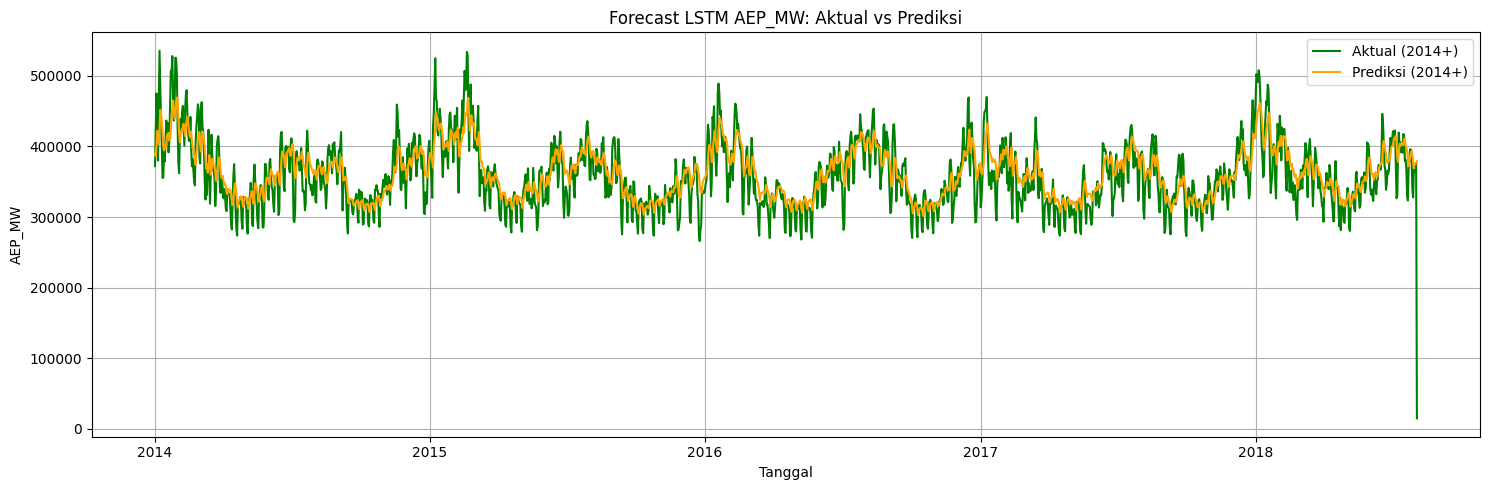

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
# 2. Plot data aktual setelah 2014 (test)
plt.plot(test_dates, y_test_inv, label='Aktual (2014+)', color='green')

# 3. Plot hasil prediksi setelah 2014
plt.plot(test_dates, y_pred_inv, label='Prediksi (2014+)', color='orange')

# Format
plt.title('Forecast LSTM AEP_MW: Aktual vs Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('AEP_MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


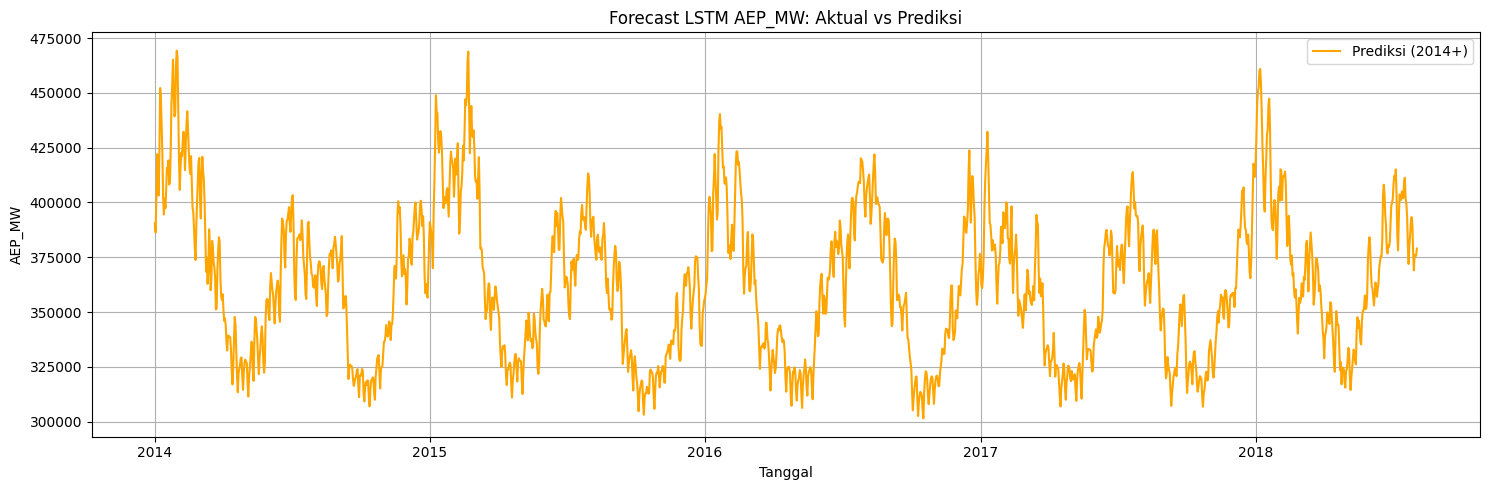

In [57]:
plt.figure(figsize=(15, 5))
# 3. Plot hasil prediksi setelah 2014
plt.plot(test_dates, y_pred_inv, label='Prediksi (2014+)', color='orange')

# Format
plt.title('Forecast LSTM AEP_MW: Aktual vs Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('AEP_MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

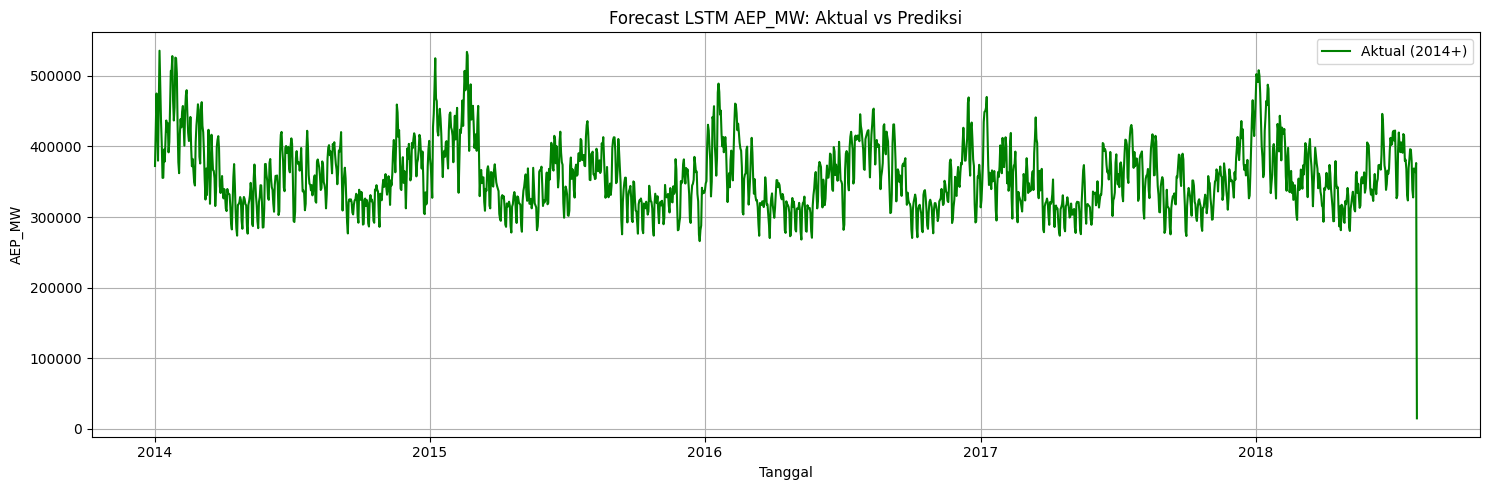

In [56]:
plt.figure(figsize=(15, 5))
# 2. Plot data aktual setelah 2014 (test)
plt.plot(test_dates, y_test_inv, label='Aktual (2014+)', color='green')

# Format
plt.title('Forecast LSTM AEP_MW: Aktual vs Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('AEP_MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
from tensorflow.keras.layers import Dropout

In [64]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(seq_length, X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - loss: 0.0540 - val_loss: 0.0040
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - loss: 0.0075 - val_loss: 0.0042
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - loss: 0.0065 - val_loss: 0.0044
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - loss: 0.0065 - val_loss: 0.0044
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 34s 282ms/step - loss: 0.0061 - val_loss: 0.0053
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 26s 282ms/step - loss: 0.0063 - val_loss: 0.0038
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 21s 230ms/step - loss: 0.0061 - val_loss: 0.0039
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - loss: 0.0062 - val_loss: 0.0038
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - loss: 0.0055 - val_loss: 0.0037
Epoch 10/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 26s 287ms/step - loss: 0.0061 - val_loss: 0.0047
Epoch 11/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 26s 290ms/step - loss: 0.0060 - val_loss: 0.0050
Epoch 12/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41

In [66]:
# SEQ 365

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")


53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step
RMSE: 0.0648


In [109]:
# Hanya pakai AEP_MW
data = df[['AEP_MW']]

# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data.iloc[:cutoff_index])
data_scaled = scaler.transform(data)


In [110]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])
    return np.array(X), np.array(y)

seq_length = 365
X, y = create_sequences(data_scaled, seq_length)


In [122]:
# Split
X_train, X_test = X[:cutoff_index - seq_length], X[cutoff_index - seq_length:]
y_train, y_test = y[:cutoff_index - seq_length], y[cutoff_index - seq_length:]

# Build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0515 - val_loss: 0.0153
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0141 - val_loss: 0.0143
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0129 - val_loss: 0.0138
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.0131 - val_loss: 0.0133
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0118 - val_loss: 0.0123
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0117 - val_loss: 0.0125
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.0089 - val_loss: 0.0099
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0085 - val_loss: 0.0079
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0076 - val_loss: 0.0069
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0075 - val_loss: 0.0067
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.0077 - val_l

In [123]:
y_pred = model.predict(X_test)

# Gabungkan prediksi dengan dummy kolom (karena cuma 1 kolom AEP_MW)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'✅ LSTM RMSE (tanpa sincos): {rmse:.4f}')


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
✅ LSTM RMSE (tanpa sincos): 21020.7720


array([[372302.],
       [425658.],
       [475042.],
       ...,
       [363628.],
       [376504.],
       [ 14809.]], shape=(1676, 1))

In [129]:
train_df = data[data.index < '2014-01-01']
test_df = data[data.index >= '2014-01-01']

train_raw = train_df['AEP_MW'].values.reshape(-1, 1)
test_raw = test_df['AEP_MW'].values.reshape(-1, 1)


In [130]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_raw)
test_scaled = scaler.transform(test_raw)


In [131]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 365
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

X_train = X_train.reshape((X_train.shape[0], seq_length, 1))
X_test = X_test.reshape((X_test.shape[0], seq_length, 1))


In [139]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- 1. Data: asumsikan df['AEP_PW'] dan index adalah datetime
df.index = pd.to_datetime(df.index)
df = df.sort_index()
data = df[['AEP_MW']]

# --- 2. Split berdasarkan waktu
train_df = data[data.index < '2014-01-01']
test_df = data[data.index >= '2014-01-01']

train_raw = train_df['AEP_MW'].values.reshape(-1, 1)
test_raw = test_df['AEP_MW'].values.reshape(-1, 1)

# --- 3. Scaling (fit di train, transform di test)
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_raw)
test_scaled = scaler.transform(test_raw)

# --- 4. Buat window sequence
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

X_train = X_train.reshape((X_train.shape[0], seq_length, 1))
X_test = X_test.reshape((X_test.shape[0], seq_length, 1))

# --- 5. Model builder function
def build_model(units=32):
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', input_shape=(seq_length, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# --- 6. SciKeras wrapper + param search
model = KerasRegressor(model=build_model, verbose=0)

param_dist = {
    'model__units': [16, 32, 64],
    'batch_size': [8, 16, 32],
    'epochs': [10, 20, 30]
}

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_iter=5,
    verbose=2,
    n_jobs=1
)

search.fit(X_train, y_train)

# --- 7. Evaluasi RMSE
best_model = search.best_estimator_.model
y_pred_scaled = search.predict(X_test)


y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"✅ Final RMSE: {rmse:.2f}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END ...........batch_size=8, epochs=10, model__units=16; total time=   4.3s


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END ...........batch_size=8, epochs=10, model__units=16; total time=   4.1s


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END ...........batch_size=8, epochs=10, model__units=16; total time=   5.1s


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END ...........batch_size=8, epochs=30, model__units=16; total time=  15.4s


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END ...........batch_size=8, epochs=30, model__units=16; total time=  16.7s


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END ...........batch_size=8, epochs=30, model__units=16; total time=  17.5s


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END ...........batch_size=8, epochs=10, model__units=64; total time=   7.3s


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END ...........batch_size=8, epochs=10, model__units=64; total time=   7.7s


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END ...........batch_size=8, epochs=10, model__units=64; total time=   5.4s


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END ..........batch_size=32, epochs=10, model__units=64; total time=   2.7s


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END ..........batch_size=32, epochs=10, model__units=64; total time=   2.8s


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END ..........batch_size=32, epochs=10, model__units=64; total time=   2.6s


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END ..........batch_size=16, epochs=10, model__units=64; total time=   3.6s


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END ..........batch_size=16, epochs=10, model__units=64; total time=   3.6s


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END ..........batch_size=16, epochs=10, model__units=64; total time=   4.0s


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Final RMSE: 23065.33


In [138]:
best_model = search.best_estimator_.model
y_pred_scaled = search.predict(X_test)


# Inverse scaling
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse:.2f}")


RMSE: 23301.78


In [133]:
!pip install scikeras




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f'✅ XGBoost RMSE: {rmse_xgb:.4f}')

✅ XGBoost RMSE: 38718.2488


In [140]:
df

,AEP_MW,dayofyear,sin_day,cos_day
Datetime,,,,
2004-10-01,328544.0,275,-0.999769,0.021516
2004-10-02,311997.0,276,-0.999250,0.038722
2004-10-03,293450.0,277,-0.998435,0.055917
2004-10-04,343417.0,278,-0.997325,0.073095
2004-10-05,346553.0,279,-0.995919,0.090252
...,...,...,...,...
2018-07-30,368834.0,211,-0.471160,-0.882048
2018-07-31,364327.0,212,-0.486273,-0.873807
2018-08-01,363628.0,213,-0.501242,-0.865307


In [150]:
train_df = df[df.index < '2014-01-01']
test_df = df[df.index >= '2014-01-01']

In [151]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [174]:
# --- Split train/test ---
train_df = df[df.index < '2014-01-01']
test_df = df[df.index >= '2014-01-01']

# --- Normalisasi ---
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.transform(test_df)

# --- Buat sequence ---
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

Epoch 1/100


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0555 - val_loss: 0.0138
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0133 - val_loss: 0.0138
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0133 - val_loss: 0.0128
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0128 - val_loss: 0.0127
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0128 - val_loss: 0.0122
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0125 - val_loss: 0.0118
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0119 - val_loss: 0.0111
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0112 - val_loss: 0.0104
Epoch 9/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 10/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0082 - val_loss: 0.0082
Epoch 11/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0076 - val_loss: 0.0069
Epoch 12/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.008

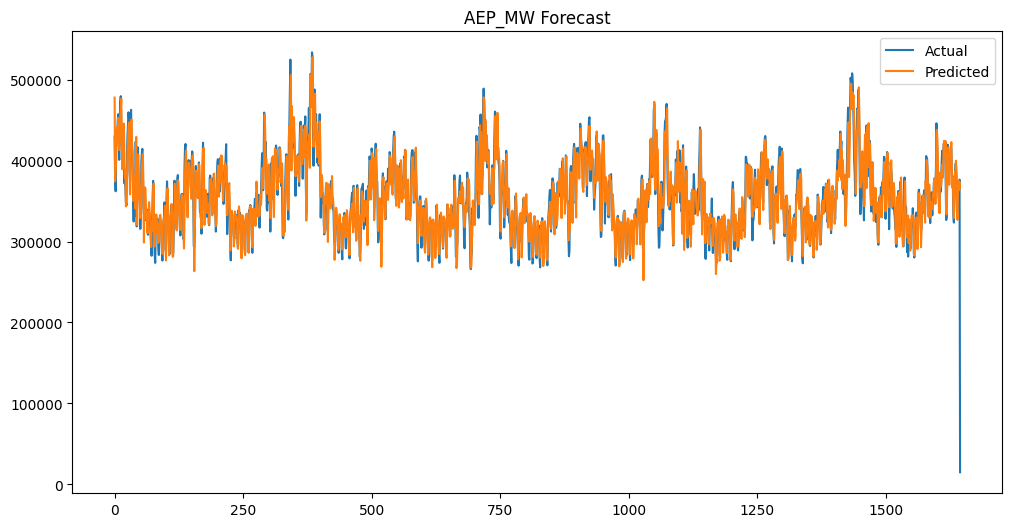

In [ ]:

# --- Bangun model LSTM ---
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# --- Train model ---
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# --- Evaluasi ---
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE:", rmse)

# --- Visualisasi ---
plt.figure(figsize=(12,6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('AEP_MW Forecast')
plt.legend()
plt.show()

In [167]:
import xgboost as xgb

RMSE: 19953.570680627683


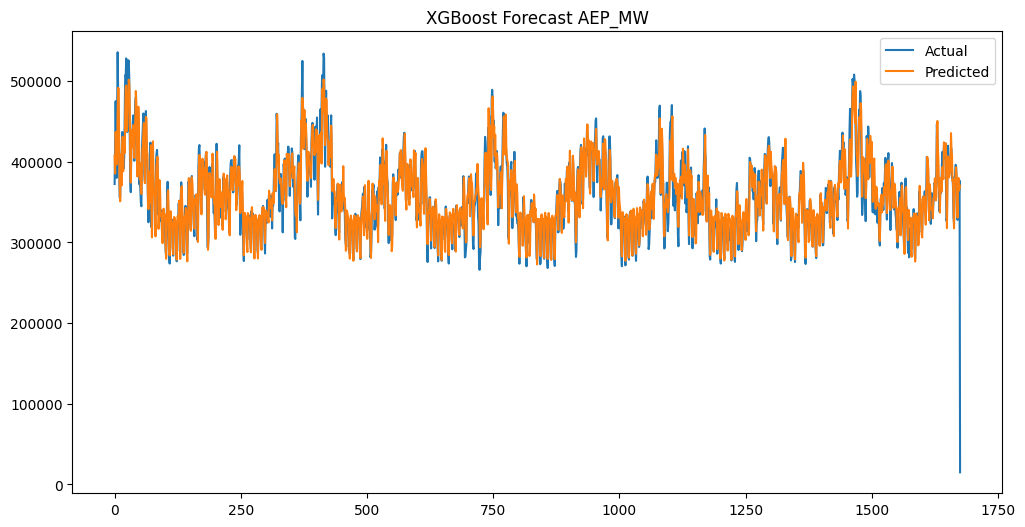

In [168]:
# --- Feature engineering ---
df_feat = df.copy()
for lag in [1, 2, 3, 7, 14, 30]:
    df_feat[f'lag_{lag}'] = df_feat['AEP_MW'].shift(lag)

# Tambah rolling mean
df_feat['rolling_mean_7'] = df_feat['AEP_MW'].rolling(window=7).mean()
df_feat['rolling_mean_30'] = df_feat['AEP_MW'].rolling(window=30).mean()

# Tambah fitur waktu
df_feat['dayofweek'] = df_feat.index.dayofweek
df_feat['month'] = df_feat.index.month
df_feat['dayofyear'] = df_feat.index.dayofyear

df_feat.dropna(inplace=True)

# --- Split train/test ---
train = df_feat[df_feat.index < '2014-01-01']
test = df_feat[df_feat.index >= '2014-01-01']

X_train = train.drop(columns=['AEP_MW'])
y_train = train['AEP_MW']
X_test = test.drop(columns=['AEP_MW'])
y_test = test['AEP_MW']

# --- Train model XGBoost ---
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# --- Predict & evaluate ---
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# --- Plot hasil ---
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('XGBoost Forecast AEP_MW')
plt.legend()
plt.show()

In [176]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 430.4 kB/s eta 0:00:30
   - -------------------------------------- 0.5/13.3 MB 430.4 kB/s eta 0:00:30
   - -------------------------------------- 0.5/13.3 MB 430.4 kB/s eta 0:00:30
   -- ------------------------------------- 0.8/13.3 MB 459.9 kB/s eta 0:00:28
   -- ------------------------------------- 0.8/13.3 MB 459.9 kB/s eta 0:00:28
   -- ------------------------------------- 0.8/13.3 MB 459.9 kB/s eta 0:00:28
   --- ------------------------------------ 1.0/13.3 MB 437.9 kB/s eta 0:00:29
   --- ------------------------------------ 1.3/13.3 MB 516.3 kB/s eta 0:00:24
   ---- ----------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
16:12:18 - cmdstanpy - INFO - Chain [1] start processing
16:12:20 - cmdstanpy - INFO - Chain [1] done processing


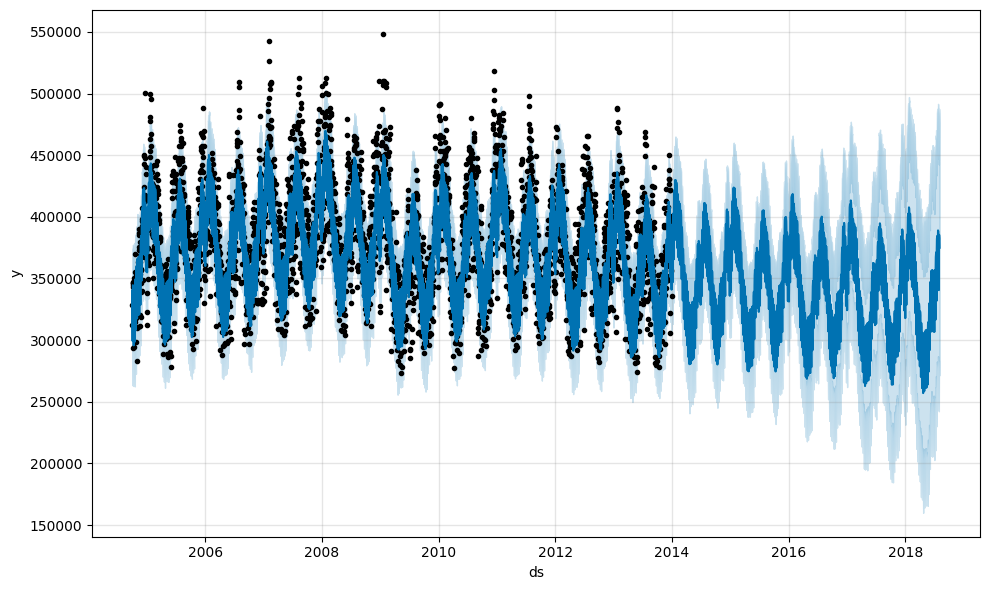

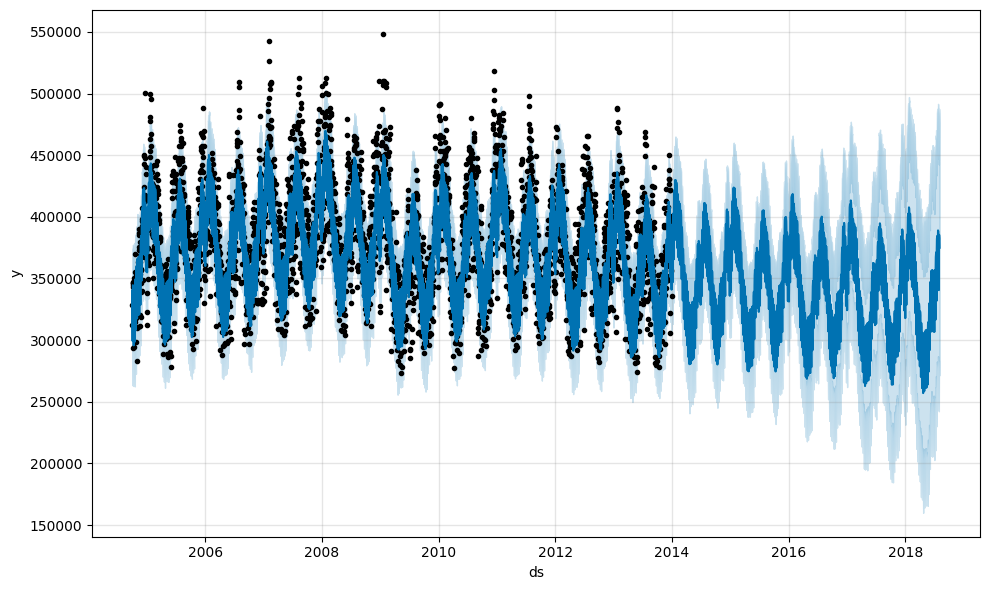

In [ ]:
from prophet import Prophet

df_prophet = df.reset_index().rename(columns={"Datetime": "ds", "AEP_MW": "y"})
model = Prophet()
model.fit(df_prophet[df_prophet['ds'] < '2014'])

future = model.make_future_dataframe(periods=len(df_prophet[df_prophet['ds'] >= '2014']))
forecast = model.predict(future)

# Visualisasi
model.plot(forecast)

In [179]:
# Hitung RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("Prophet RMSE:", rmse)

Prophet RMSE: 20229.564951637494


Epoch 1/100


c:\Users\71486\Test_MT\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1037 - val_loss: 0.0123
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0139 - val_loss: 0.0114
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0127 - val_loss: 0.0113
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0139 - val_loss: 0.0113
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0133 - val_loss: 0.0118
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0132 - val_loss: 0.0112
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0133 - val_loss: 0.0112
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0130 - val_loss: 0.0110
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0135 - val_loss: 0.0112
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0133 - val_loss: 0.0109
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0130 - val_loss: 0.0108
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0

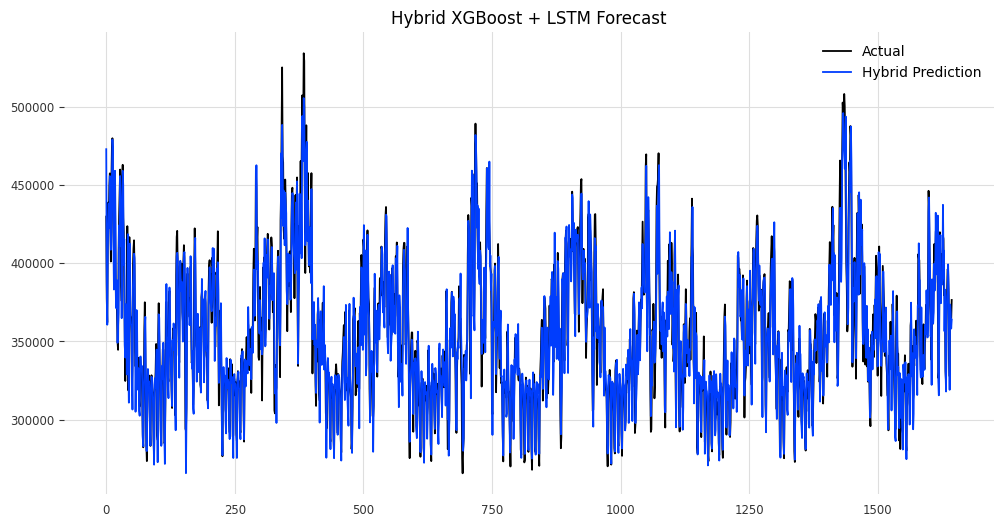

In [249]:
df_feat = df.copy()
for lag in [1, 2, 3, 7, 14, 30]:
    df_feat[f'lag_{lag}'] = df_feat['AEP_MW'].shift(lag)
df_feat['rolling_mean_7'] = df_feat['AEP_MW'].rolling(7).mean()
df_feat['rolling_mean_30'] = df_feat['AEP_MW'].rolling(30).mean()
df_feat['dayofweek'] = df_feat.index.dayofweek
df_feat['month'] = df_feat.index.month
df_feat['dayofyear'] = df_feat.index.dayofyear
df_feat.dropna(inplace=True)

train = df_feat[df_feat.index < '2014-01-01']
test = df_feat[df_feat.index >= '2014-01-01']

X_train = train.drop(columns=['AEP_MW'])
y_train = train['AEP_MW']
X_test = test.drop(columns=['AEP_MW'])
y_test = test['AEP_MW']

model_xgb = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.02,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model_xgb.fit(X_train, y_train)
xgb_pred = model_xgb.predict(X_test)

# --- Step 2: Residual ---
residual = y_test.values - xgb_pred

# --- Step 3: LSTM untuk Residual ---
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale residual
scaler = MinMaxScaler()
residual_scaled = scaler.fit_transform(residual.reshape(-1,1))

# Buat sequence
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X_lstm, y_lstm = create_sequences(residual_scaled, seq_length)

# Bangun model
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
history = model_lstm.fit(
    X_lstm,
    y_lstm,
    epochs=100,
    batch_size=32,
    validation_split=0.1,    # << TAMBAHAN VALIDATION
    verbose=1,
)
model_lstm.fit(
    X_lstm,
    y_lstm,
    epochs=100,
    batch_size=32,
    validation_split=0.1,    # << TAMBAHAN VALIDATION
    verbose=1,
)
# Prediksi residual
lstm_pred_scaled = model_lstm.predict(X_lstm)
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)

# --- Step 4: Gabungkan hasil ---
xgb_pred = xgb_pred[seq_length:]  # samakan panjang
y_test_final = y_test.values[seq_length:]
final_pred = xgb_pred + lstm_pred.flatten()

rmse_hybrid = np.sqrt(mean_squared_error(y_test_final, final_pred))
print("Hybrid RMSE:", rmse_hybrid)

# --- Visualisasi ---
plt.figure(figsize=(12,6))
plt.plot(y_test_final, label='Actual')
plt.plot(final_pred, label='Hybrid Prediction')
plt.title('Hybrid XGBoost + LSTM Forecast')
plt.legend()
plt.show()

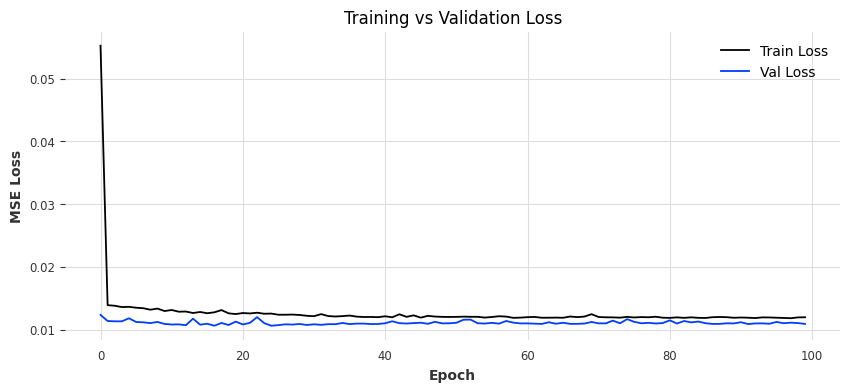

In [250]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


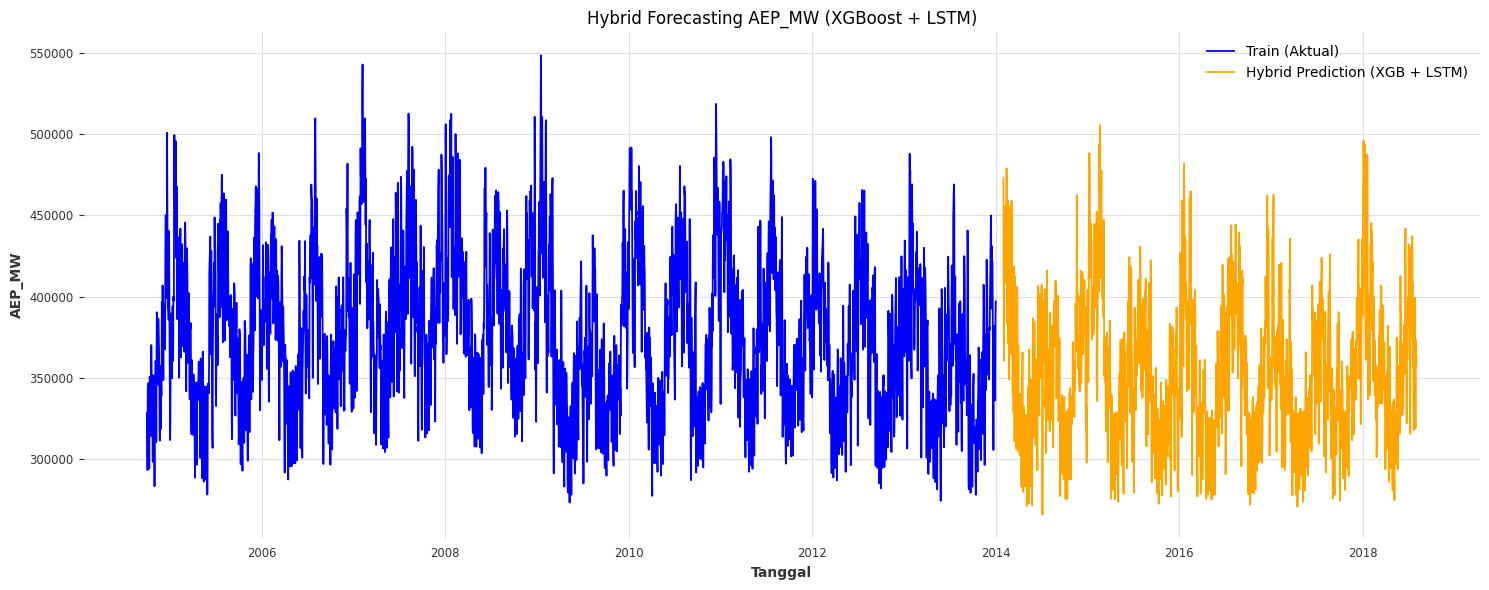

In [255]:
import matplotlib.pyplot as plt

# --- 1. Data aktual gabungan ---
full_data = df['AEP_MW'].values

# --- 2. Tentukan indeks cutoff dan panjang hasil prediksi final ---
cutoff_index = df.index.get_loc('2014-01-01')
start_pred_index = cutoff_index + seq_length  # karena LSTM pakai seq_length pertama
end_pred_index = start_pred_index + len(final_pred)

# --- 3. Ambil index tanggal untuk test (yang sejajar dengan final_pred) ---
test_dates = df.index[start_pred_index:end_pred_index]

# --- 4. Plot hasil ---
plt.figure(figsize=(15, 6))

# Plot data latih (aktual sebelum 2014)
plt.plot(df.index[:cutoff_index], full_data[:cutoff_index], label='Train (Aktual)', color='blue')

# Plot aktual pada test set
# plt.plot(test_dates, y_test_final, label='Test (Aktual)', color='green', linestyle='dashed')

# Plot hasil prediksi hybrid
plt.plot(test_dates, final_pred, label='Hybrid Prediction (XGB + LSTM)', color='orange')

# Tambahan layout
plt.title('Hybrid Forecasting AEP_MW (XGBoost + LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('AEP_MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


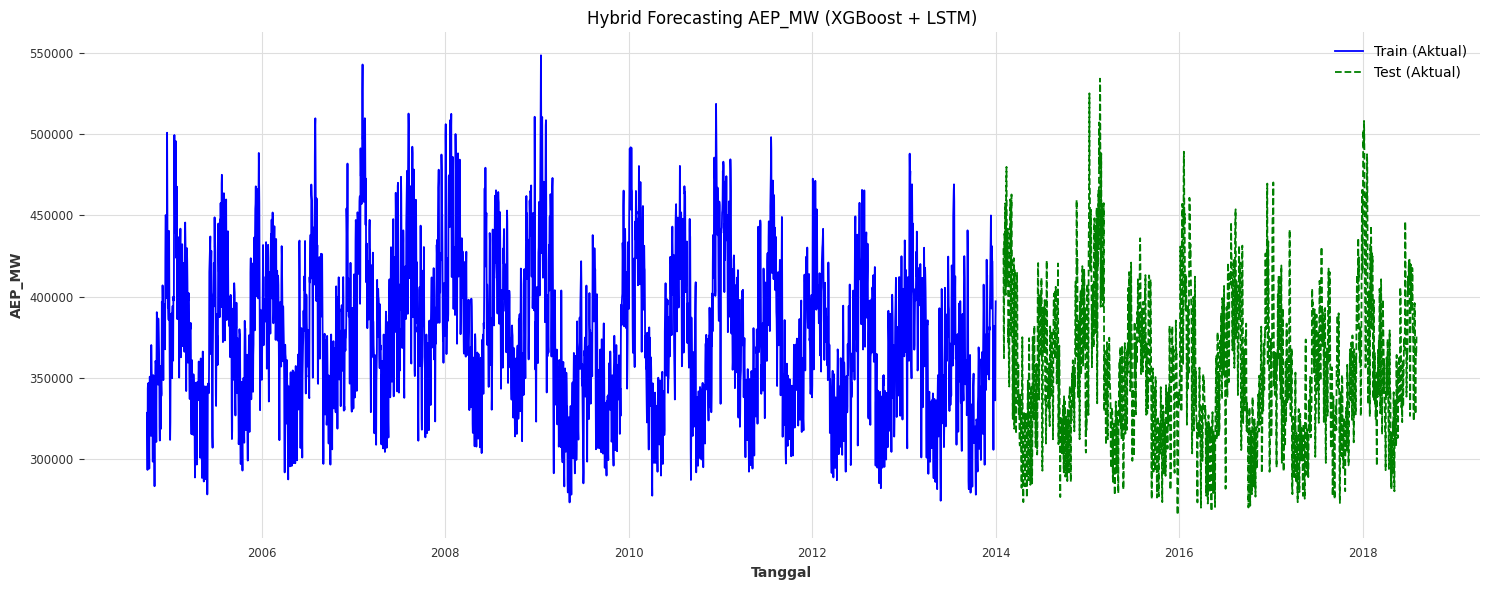

In [256]:
import matplotlib.pyplot as plt

# --- 1. Data aktual gabungan ---
full_data = df['AEP_MW'].values

# --- 2. Tentukan indeks cutoff dan panjang hasil prediksi final ---
cutoff_index = df.index.get_loc('2014-01-01')
start_pred_index = cutoff_index + seq_length  # karena LSTM pakai seq_length pertama
end_pred_index = start_pred_index + len(final_pred)

# --- 3. Ambil index tanggal untuk test (yang sejajar dengan final_pred) ---
test_dates = df.index[start_pred_index:end_pred_index]

# --- 4. Plot hasil ---
plt.figure(figsize=(15, 6))

# Plot data latih (aktual sebelum 2014)
plt.plot(df.index[:cutoff_index], full_data[:cutoff_index], label='Train (Aktual)', color='blue')

# Plot aktual pada test set
plt.plot(test_dates, y_test_final, label='Test (Aktual)', color='green', linestyle='dashed')

# Plot hasil prediksi hybrid
# plt.plot(test_dates, final_pred, label='Hybrid Prediction (XGB + LSTM)', color='orange')

# Tambahan layout
plt.title('Hybrid Forecasting AEP_MW (XGBoost + LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('AEP_MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Hybrid RMSE: 16418.652598487493


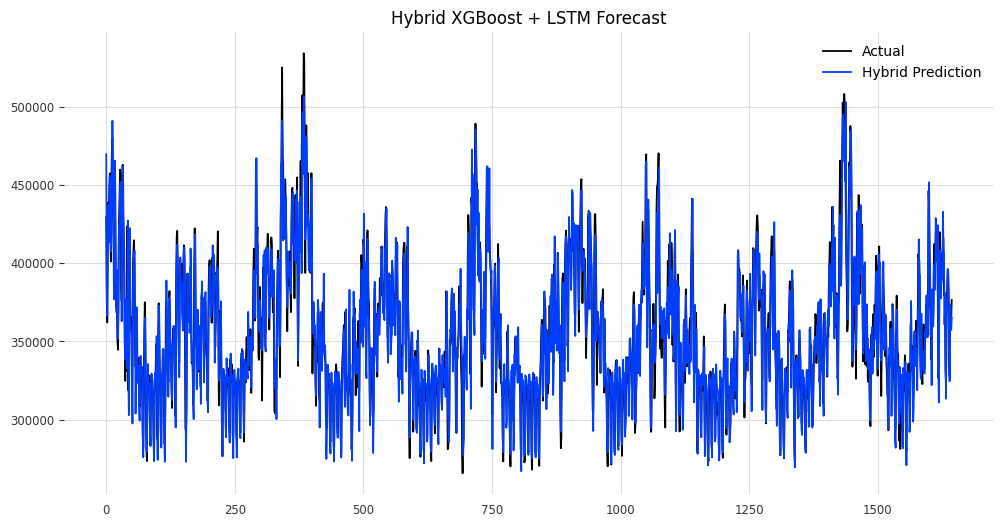

In [233]:
rmse_hybrid = np.sqrt(mean_squared_error(y_test_final, final_pred))
print("Hybrid RMSE:", rmse_hybrid)

# --- Visualisasi ---
plt.figure(figsize=(12,6))
plt.plot(y_test_final, label='Actual')
plt.plot(final_pred, label='Hybrid Prediction')
plt.title('Hybrid XGBoost + LSTM Forecast')
plt.legend()
plt.show()

RMSE: 17970.296244437064


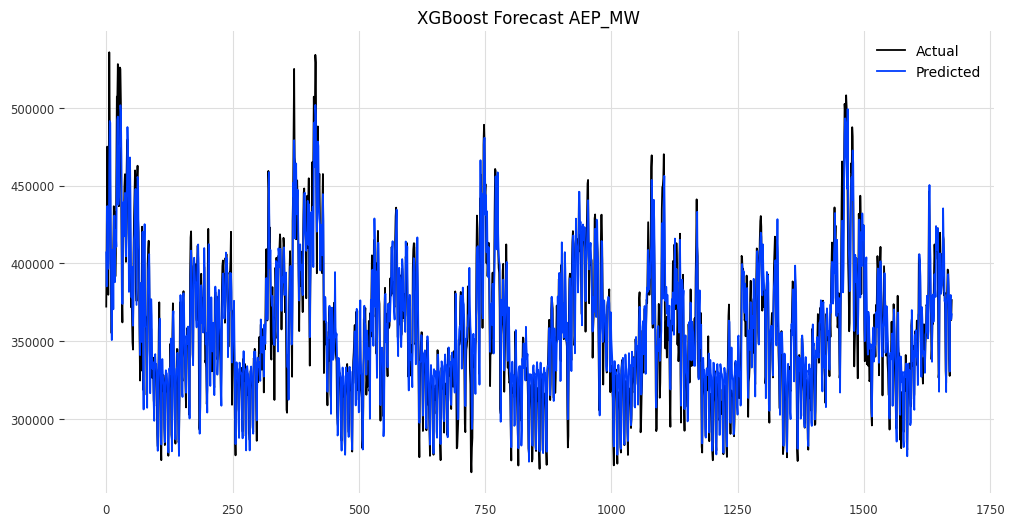

In [219]:
# --- Feature engineering ---
df_feat = df.copy()
for lag in [1, 2, 3, 7, 14, 30]:
    df_feat[f'lag_{lag}'] = df_feat['AEP_MW'].shift(lag)

# Tambah rolling mean
df_feat['rolling_mean_7'] = df_feat['AEP_MW'].rolling(window=7).mean()
df_feat['rolling_mean_30'] = df_feat['AEP_MW'].rolling(window=30).mean()

# Tambah fitur waktu
df_feat['dayofweek'] = df_feat.index.dayofweek
df_feat['month'] = df_feat.index.month
df_feat['dayofyear'] = df_feat.index.dayofyear

df_feat.dropna(inplace=True)

# --- Split train/test ---
train = df_feat[df_feat.index < '2014-01-01']
test = df_feat[df_feat.index >= '2014-01-01']

X_train = train.drop(columns=['AEP_MW'])
y_train = train['AEP_MW']
X_test = test.drop(columns=['AEP_MW'])
y_test = test['AEP_MW']

# --- Train model XGBoost ---
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# --- Predict & evaluate ---
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# --- Plot hasil ---
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('XGBoost Forecast AEP_MW')
plt.legend()
plt.show()

In [251]:
relative_error = 15791 / y_test.mean()
print(f'Relative RMSE: {relative_error:.2%}')

Relative RMSE: 4.42%


In [ ]:
df_feat = df.copy()
for lag in [1, 2, 3, 7, 14, 30]:
    df_feat[f'lag_{lag}'] = df_feat['AEP_MW'].shift(lag)
df_feat['rolling_mean_7'] = df_feat['AEP_MW'].rolling(7).mean()
df_feat['rolling_mean_30'] = df_feat['AEP_MW'].rolling(30).mean()
df_feat['dayofweek'] = df_feat.index.dayofweek
df_feat['month'] = df_feat.index.month
df_feat['dayofyear'] = df_feat.index.dayofyear
df_feat.dropna(inplace=True)

train = df_feat[df_feat.index < '2014-01-01']
test = df_feat[df_feat.index >= '2014-01-01']

X_train = train.drop(columns=['AEP_MW'])
y_train = train['AEP_MW']
X_test = test.drop(columns=['AEP_MW'])
y_test = test['AEP_MW']

model_xgb = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.02,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model_xgb.fit(X_train, y_train)
xgb_pred = model_xgb.predict(X_test)

# --- Step 2: Residual ---
residual = y_test.values - xgb_pred

# --- Step 3: LSTM untuk Residual ---
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale residual
scaler = MinMaxScaler()
residual_scaled = scaler.fit_transform(residual.reshape(-1,1))

# Buat sequence
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X_lstm, y_lstm = create_sequences(residual_scaled, seq_length)

# Bangun model
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
history = model_lstm.fit(
    X_lstm,
    y_lstm,
    epochs=100,
    batch_size=32,
    validation_split=0.1,    # << TAMBAHAN VALIDATION
    verbose=1,
)
model_lstm.fit(
    X_lstm,
    y_lstm,
    epochs=100,
    batch_size=32,
    validation_split=0.1,    # << TAMBAHAN VALIDATION
    verbose=1,
)
# Prediksi residual
lstm_pred_scaled = model_lstm.predict(X_lstm)
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)

# --- Step 4: Gabungkan hasil ---
xgb_pred = xgb_pred[seq_length:]  # samakan panjang
y_test_final = y_test.values[seq_length:]
final_pred = xgb_pred + lstm_pred.flatten()

rmse_hybrid = np.sqrt(mean_squared_error(y_test_final, final_pred))
print("Hybrid RMSE:", rmse_hybrid)

# --- Visualisasi ---
plt.figure(figsize=(12,6))
plt.plot(y_test_final, label='Actual')
plt.plot(final_pred, label='Hybrid Prediction')
plt.title('Hybrid XGBoost + LSTM Forecast')
plt.legend()
plt.show()